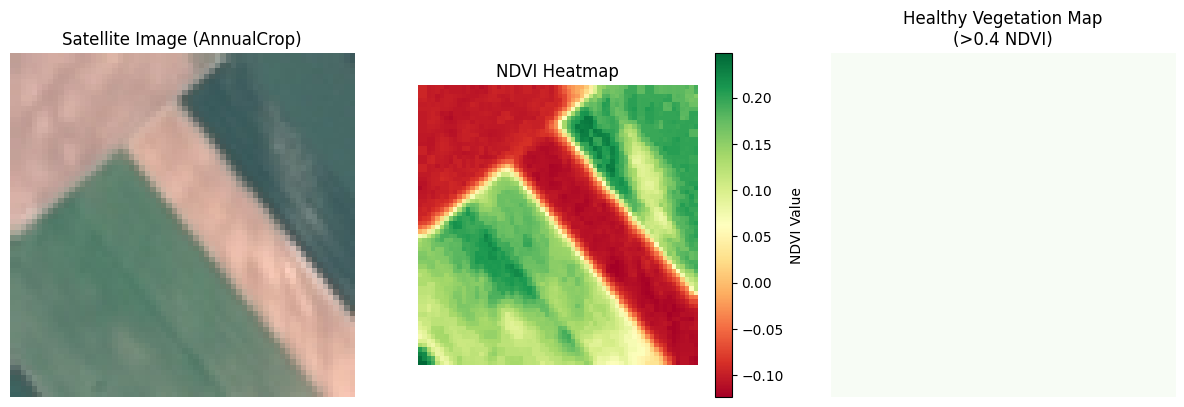

📊 NDVI Report
🖼️ Image Class     : AnnualCrop
🌱 Healthy Area %  : 0.0% (NDVI > 0.4)
📌 NDVI Range      : -0.12 to 0.25


In [2]:
# 🌱 NDVI Visualizer: Satellite-Based Vegetation Health Analyzer
# 📌 Fully ready-to-run ISRO-aligned project

# STEP 1: Install dependencies
!pip install opencv-python-headless --quiet
!pip install torchvision --quiet

# STEP 2: Import required libraries
import numpy as np
import matplotlib.pyplot as plt
import torchvision
import torchvision.transforms as transforms
from PIL import Image

# STEP 3: Load EuroSAT satellite dataset (simulated NIR + Red bands)
transform = transforms.Compose([
    transforms.Resize((64, 64)),
    transforms.ToTensor()
])

dataset = torchvision.datasets.EuroSAT(
    root="./data",
    download=True,
    transform=transform
)

# STEP 4: Pick a vegetation-based satellite image
image_index = 22  # Change index (0-1000) to view different regions
img_tensor, label = dataset[image_index]
class_name = dataset.classes[label]
img = img_tensor.permute(1, 2, 0).numpy()

# STEP 5: Simulate NDVI using Red (R) and NIR (G) channels
# (In true NDVI, NIR is a separate band. Here we simulate with available RGB)
red_band = img[:, :, 0].astype(float)   # Red
nir_band = img[:, :, 1].astype(float)   # Simulated NIR using Green

ndvi = (nir_band - red_band) / (nir_band + red_band + 1e-5)

# STEP 6: Categorize Vegetation Health
ndvi_threshold = 0.4
health_mask = ndvi > ndvi_threshold
healthy_percent = round(np.sum(health_mask) / ndvi.size * 100, 2)

# STEP 7: Visualize
plt.figure(figsize=(12, 4))

plt.subplot(1, 3, 1)
plt.imshow(img)
plt.title(f"Satellite Image ({class_name})")
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(ndvi, cmap='RdYlGn')
plt.title("NDVI Heatmap")
plt.colorbar(label="NDVI Value")
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(health_mask, cmap='Greens')
plt.title(f"Healthy Vegetation Map\n(>{ndvi_threshold} NDVI)")
plt.axis('off')

plt.tight_layout()
plt.show()

# STEP 8: Print Summary
print(f"📊 NDVI Report")
print(f"🖼️ Image Class     : {class_name}")
print(f"🌱 Healthy Area %  : {healthy_percent}% (NDVI > {ndvi_threshold})")
print(f"📌 NDVI Range      : {round(ndvi.min(), 2)} to {round(ndvi.max(), 2)}")
